In [2]:
import os
import warnings
import sys
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import matplotlib.pyplot as plt
sys.path.append('../tools')
from tools import plot_training_history



---

**Introduction**

The objective of this notebook is to present the results of different Neural Network models trained on open-source data. The analysis includes the evaluation of model performance, comparison of results, and insights derived from the training process. This notebook serves as a comprehensive overview of the experiments conducted and their outcomes.


For all training run, we used two callbacks:  
1. If val_loss stagnates for 3 consecutive epochs with a minimum delta of 0.01, the learning rate is reduced by a factor of 0.1, waiting 4 epochs before retrying.  
2. If the loss function does not vary by 1% after 5 epochs, training is stopped.

----
**Basic Custom Neural Network Testing**

As starting point, we first test a very basic custom network. With the following architecture: 

In [4]:
model = tf.keras.models.load_model('../models/best_acc_basic.h5')
model.summary()

I0000 00:00:1749923166.678321   14562 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4146 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 500, 380, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 500, 380, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 498, 378, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 189, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 187, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 93, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 91, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    45,101,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,157,906 (172.26 MB)

 Trainable params: 45,157,904 (172.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

This first model performs poorly. Below we show the evolutions of the loss and accuracy for the model:

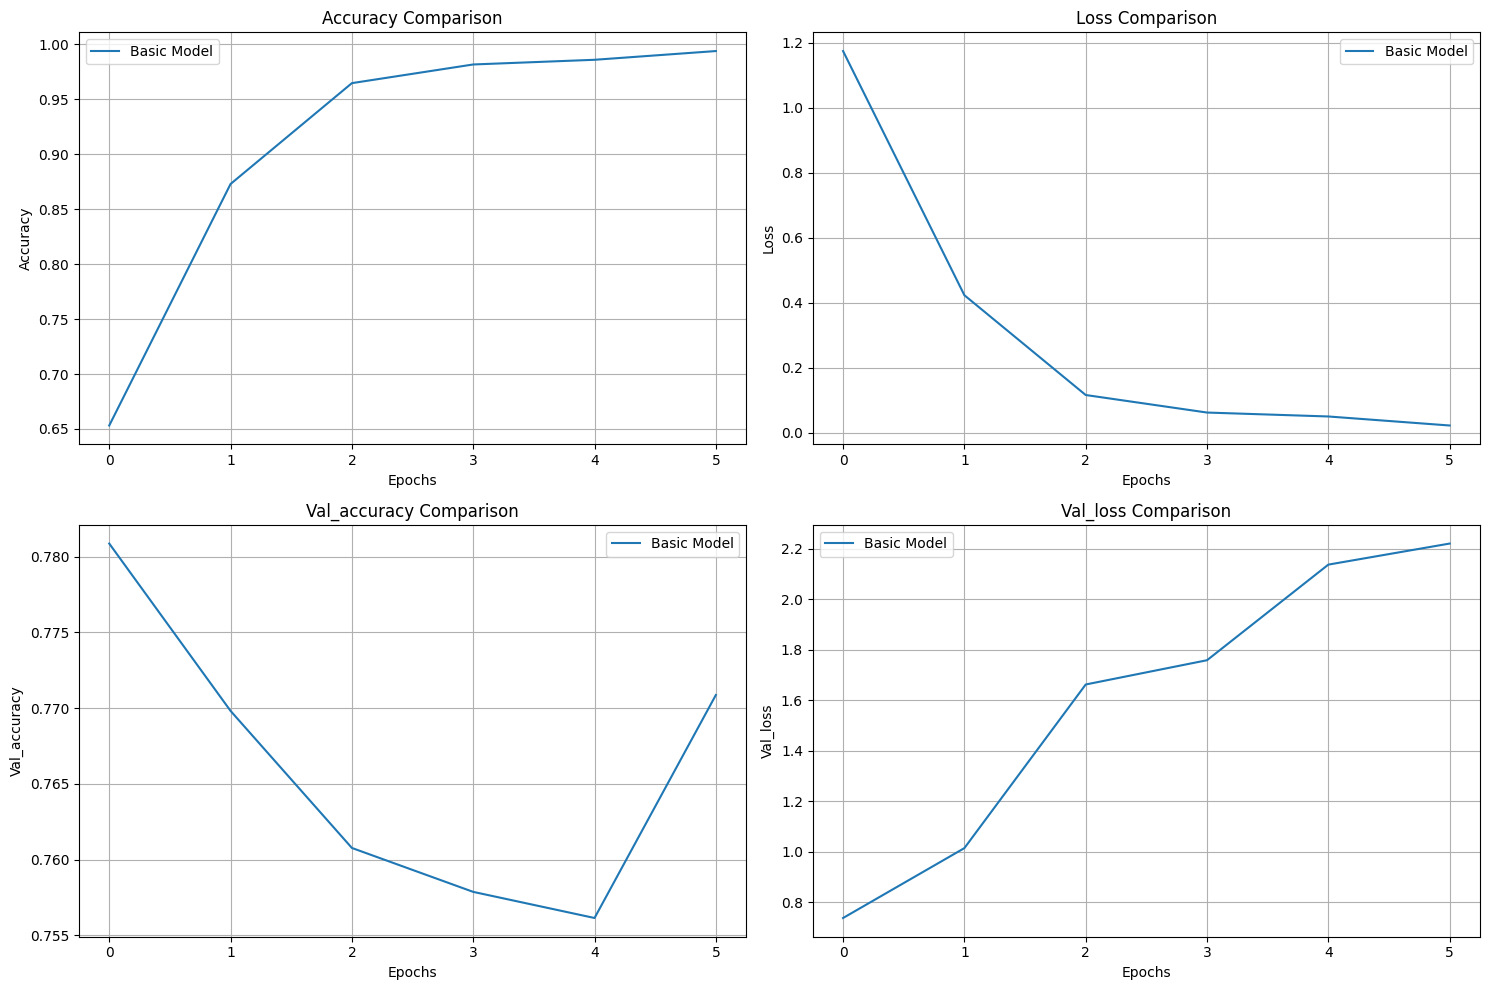

In [7]:
model_files = {
    'Basic Model': '../models/training_history/basic_log.csv'}

plot_training_history(model_files)

The first results suggest we have an overfitting problem. The accuracy for the trainning set is close to one and the loss close to zero; while the accurary for the validation set is low (0.77) and a high loss (2.2). To improve this, we try adding a Dropout layer to the model. Below the architecture and the results. 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,237,266 (50.50 MB)

 Trainable params: 13,237,264 (50.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

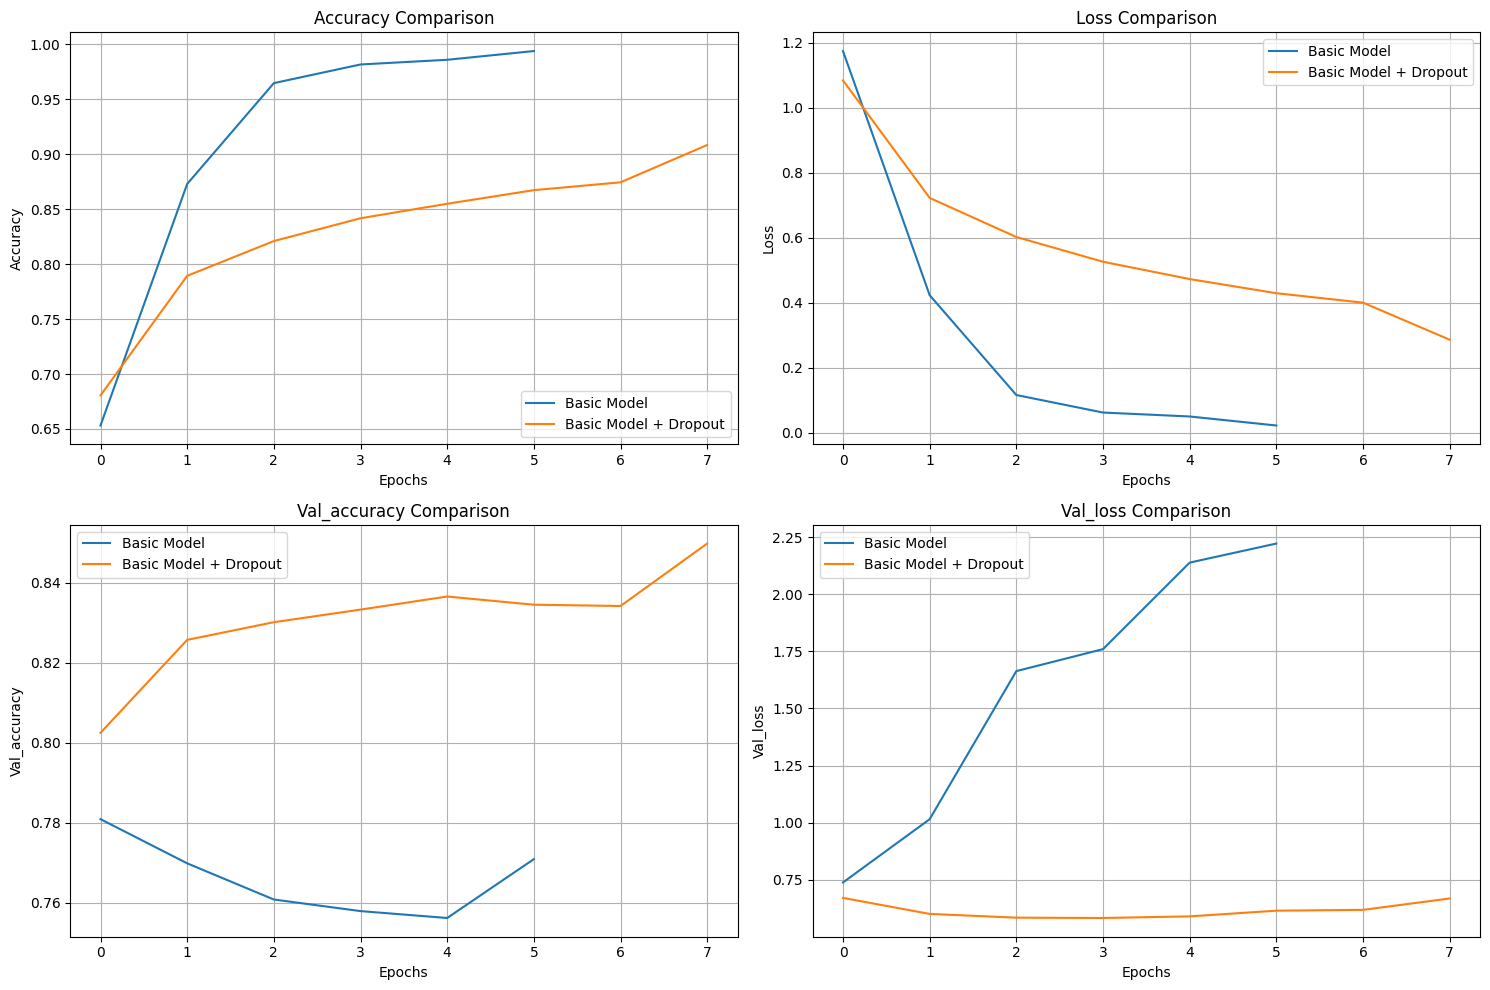

In [8]:
model = tf.keras.models.load_model('../models/best_acc_basic_ia.h5')
model.summary()

model_files = {
    'Basic Model': '../models/training_history/basic_log.csv',
    'Basic Model + Dropout': '../models/training_history/basic_ia_log.csv'
}
plot_training_history(model_files)


Adding the dropout layer improved the performance of the model on the validation set as expected. We have a higher accuracy and a lower loss than for the original model. We end up with a model having an accuracy of 0.91 for the trainning set and 0.85 for the validation set. 

----
**Transfer Learning Testing**

We test now a Transfert Learning approach, trying to use existing (and pretrained) models provided by TensorFlow.
- **Transfer Learning**: Transfer learning is a machine learning technique where a pre-trained model, which has been trained on a large dataset, is fine-tuned on a smaller, task-specific dataset. In the context of neural networks, this approach leverages the feature extraction capabilities of deep architectures trained on extensive datasets, reducing the need for large amounts of labeled data and computational resources. For our projet we tested the following architechtures: Inception V3, ResNet50 V2 and MobileNet V2

For these tests, we used three differents approaches:
1. Freezing the pretrained parameters and training only the prediction layer. 
2. Retraining the entire architecture from scratch (randomly initialized).  
3. Retraining the architecture using pretrained weights as start.  
 

**First Experiment: Freezing the pretrained parameters**

Below, we present the evolution of accuracy and loss for each architecture during the training process:

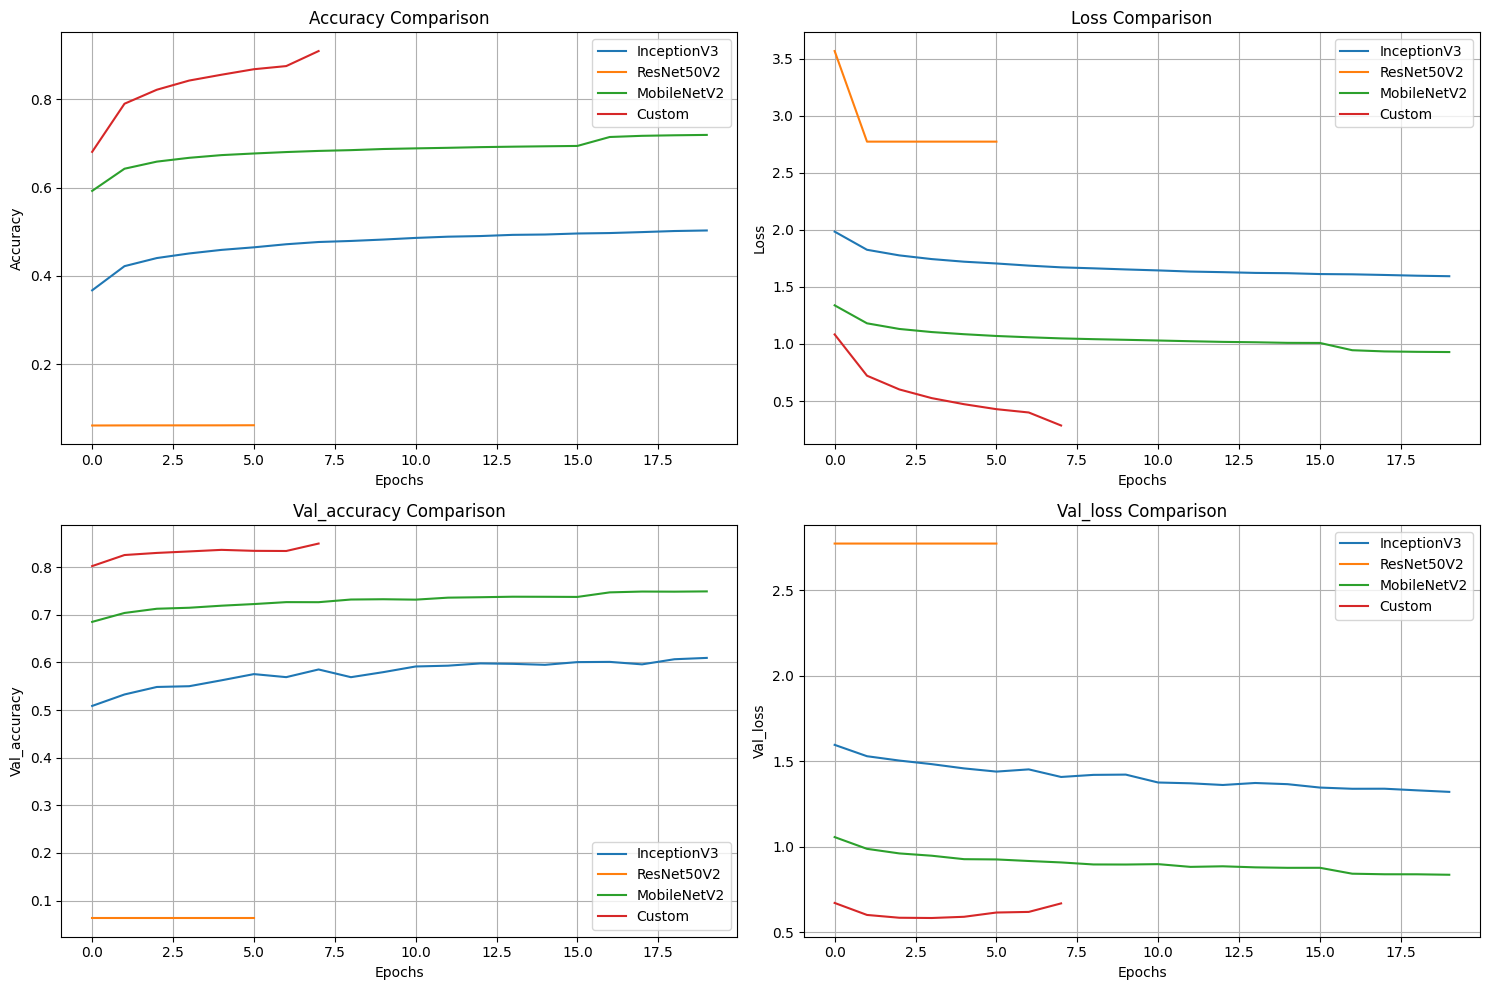

In [9]:
model_files = {
    'InceptionV3': '../models/training_history/freeze_transfert_learn_inception_v3_log.csv',
    'ResNet50V2': '../models/training_history/freeze_transfert_learn_resnet50v2_log.csv',
    'MobileNetV2': '../models/training_history/freeze_transfert_learn_mobilenetv2_1.00_224_log.csv',
    'Custom': '../models/training_history/basic_ia_log.csv'
}
plot_training_history(model_files)

None of the standard models seem to be able to beat the custom model neither in terms of accuracy nor in terms of loss. 

**Second Experiment: Retraining Standard Architecture From Scratch**

For the second test, we used the standard architecture as a starting point and retrained all parameters from scratch (random initialization). This approach consumes more resources and requires more time for training compared to using pre-trained parameters.

Below, we present the evolution of accuracy and loss for each architecture during the training process.

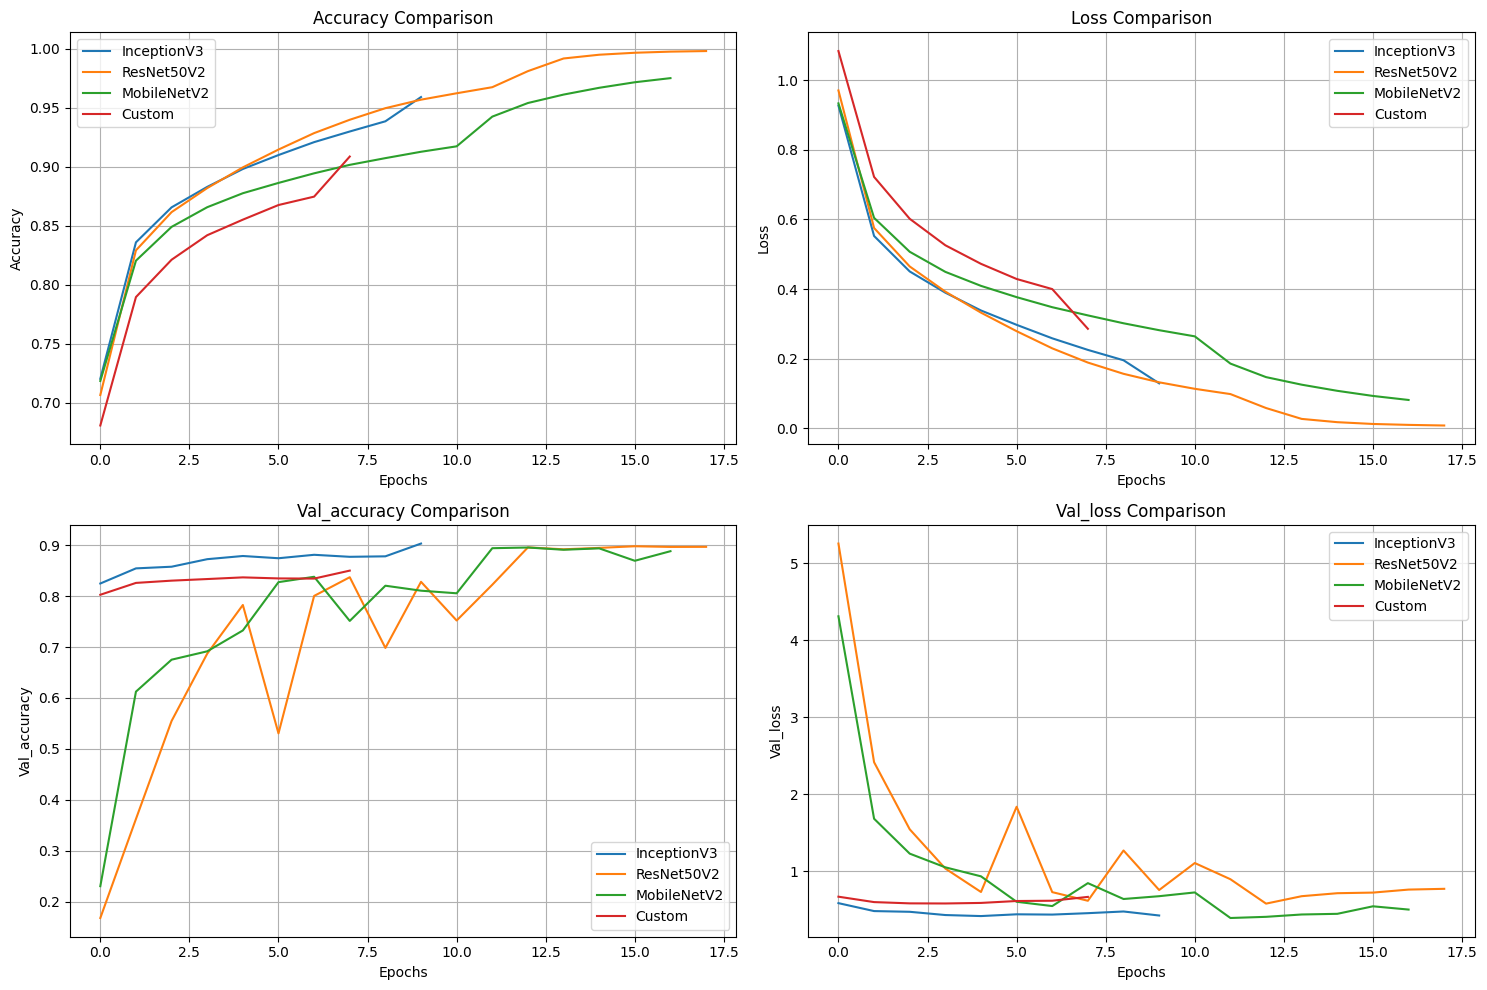

In [10]:
model_files = {
    'InceptionV3': '../models/training_history/inception_v3_log.csv',
    'ResNet50V2': '../models/training_history/resnet_log.csv',
    'MobileNetV2': '../models/training_history/mobilenetv2_1.00_300_log.csv',
    'Custom': '../models/training_history/basic_ia_log.csv'}

plot_training_history(model_files)

During the first 10 Epochs, only the InceptionV3 model seems to performs better than the basic architecture with dropout. 
However, after 10 Epochs, the basic architecture is outperformed by all the standard architectures. 
InceptionV3 model seems to be the best one in terms of accuracy and loss for the validation set.

**Third Experiment: Retraining Standard Architecture Using Pretrained Weigth**
For this third test, we retrain again the standard architectures, but this time we use pretrained parameters values as starting point. 


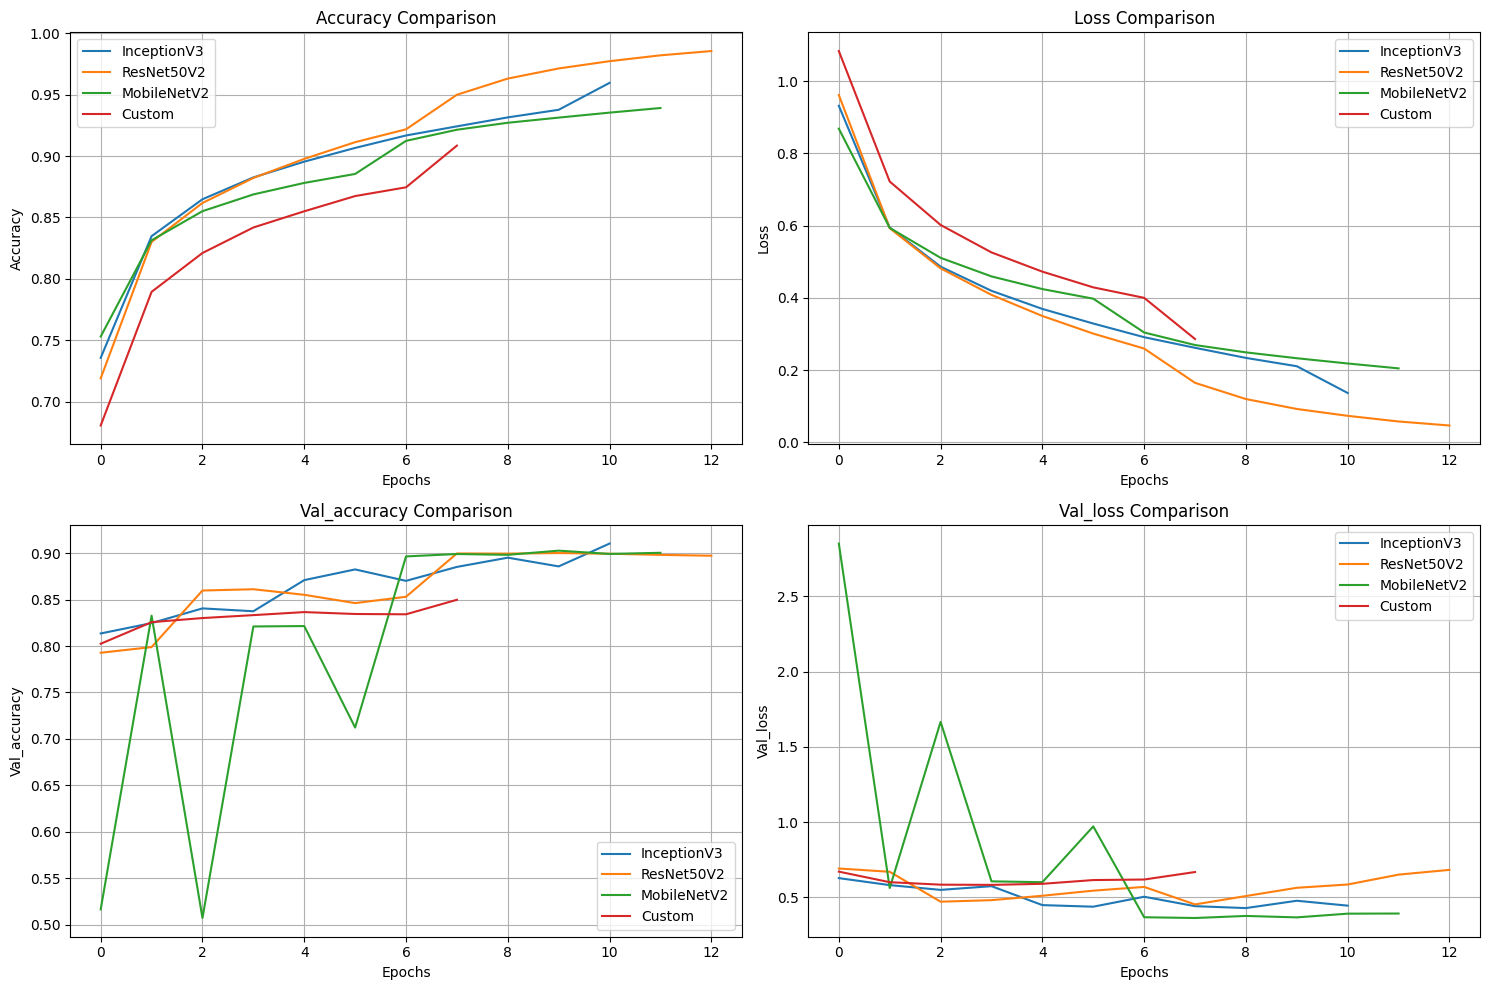

In [11]:
model_files = {
    'InceptionV3': '../models/training_history/transfert_learn_inception_v3_log.csv',
    'ResNet50V2': '../models/training_history/transfert_learn_resnet50v2_log.csv',
    'MobileNetV2': '../models/training_history/transfert_learn_mobilenetv2_1.00_224_log.csv',
    'Custom': '../models/training_history/basic_ia_log.csv'}

plot_training_history(model_files)

Again, the best model seems to be InceptionV3 giving the highest accuracy for the validation set (0.91) and the second best loss (0.44).